# Booms and Busts

#### Analysis of how players that did not have a good seasons, and players that did, impact accuracy.

**Question 1:** How does accounting for injuries impact accuracy?

**Steps:**

A. Create data frames by position of the top 25 predicted players

B. View scatter plot of expert accuracy for 2019 QBs 

C. Find the correlation between FantasyPoints and ExpertRanking

D. Create dataframe copy and remove injured players (Ben Roethlisberger, Cam Newton, and Nick Foles)

E. View scatter plot of expert accuracy without injured QBs for 2019

F. Find the correlation between FantasyPoints and ExpertRanking without injured players

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Reads in data

merged_2019_df = pd.read_csv('../data/cleaned/actual_and_projected_2019.csv')
merged_df = pd.read_csv('../data/cleaned/actual_and_projected.csv')

In [3]:
#Creates dataframes by position of the top 25 predicted players

wr_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("WR")].sort_values(by=['ADP_rerank']).iloc[:25]
rb_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("RB")].sort_values(by=['ADP_rerank']).iloc[:25]
qb_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("QB")].sort_values(by=['ADP_rerank']).iloc[:25]
te_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("TE")].sort_values(by=['ADP_rerank']).iloc[:25]

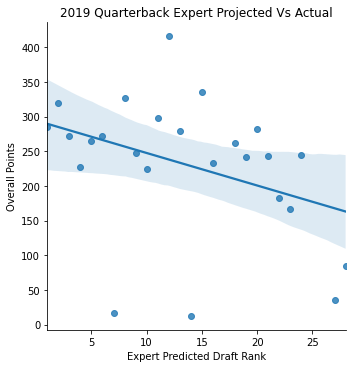

In [4]:
#Scatterplot of expert qb accuracy

ax = sns.lmplot(x = 'ExpertRanking', y = "FantasyPoints", data = qb_2019_df)
ax.set(xlabel='Expert Predicted Draft Rank', ylabel='Overall Points', title = "2019 Quarterback Expert Projected Vs Actual")

In [5]:
#Correlation between FantasyPoints and ExpertRanking

qb_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()["ExpertRanking"]["FantasyPoints"]

0.37715861375994486

In [6]:
# Create dataframe copy and remove injured players (Ben Roethlisberger, Cam Newton, and Nick Foles) 

qb_2019_removed_injuries_df = qb_2019_df.copy()
qb_2019_removed_injuries_df = qb_2019_removed_injuries_df[qb_2019_removed_injuries_df["Player"] != "Nick Foles"]
qb_2019_removed_injuries_df = qb_2019_removed_injuries_df[qb_2019_removed_injuries_df["Player"] != "Cam Newton"]
qb_2019_removed_injuries_df = qb_2019_removed_injuries_df[qb_2019_removed_injuries_df["Player"] != "Ben Roethlisberger"]

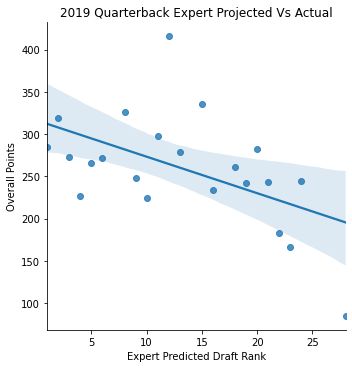

In [7]:
#Scatterplot of expert qb accuracy without injured players
ax = sns.lmplot(x = 'ExpertRanking', y = "FantasyPoints", data = qb_2019_removed_injuries_df)
ax.set(xlabel='Expert Predicted Draft Rank', ylabel='Overall Points', title = "2019 Quarterback Expert Projected Vs Actual")

In [8]:
#Correlation between FantasyPoints and ExpertRanking without injured players

qb_2019_removed_injuries_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()["ExpertRanking"]["FantasyPoints"]

0.5234082446000513

**Answer:**

Including injured QBs gives a correlation of .377 for experts based on the 2019 data, while excluding the injured QBs yields a correlation of .534. Clearly there is much greater accuracy when the injured players have been removed from the dataset.

**Observations/Interpretations:**

It is interesting to see how much of an impact removing three players changes the correlation. .523 is greater than the average correlation for any position across years by a decent margin. It would be very hard to calculate the impact for all years and all positions, but just by looking at one year and one position we can see that there is a definite influence on the accuracy of fans and experts.

**Question 2:**

How often were players in each position busts (scored significantly less than average)?

**Steps:**

A. Create dataframes of top 25 players by position for all years

B. Find average of points of top 25 predicted players in each position for all years

C. Count player that scored less than 50% below mean

D. Find percentage

E. Create data frame for plotting

F. Plot this data frame in charts

In [13]:
#Creates dataframes of top 25 players by position for all years

qb_df = merged_df[merged_df["Pos"].str.contains("QB")].sort_values(by=['ADP_rerank']).iloc[:125]
rb_df = merged_df[merged_df["Pos"].str.contains("RB")].sort_values(by=['ADP_rerank']).iloc[:125]
wr_df = merged_df[merged_df["Pos"].str.contains("WR")].sort_values(by=['ADP_rerank']).iloc[:125]
te_df = merged_df[merged_df["Pos"].str.contains("TE")].sort_values(by=['ADP_rerank']).iloc[:125]

In [59]:
#Finds average of points of top 25 predicted players in each position

qb_mean = qb_df["FantasyPoints"].mean()
rb_mean = rb_df["FantasyPoints"].mean()
wr_mean = wr_df["FantasyPoints"].mean()
te_mean = te_df["FantasyPoints"].mean()

In [52]:
#Count player that scored less than 1 standard deviation from mean

qb_below_mean = float(qb_df[qb_df["FantasyPoints"] <= qb_mean - qb_mean/2].shape[0])
rb_below_mean = float(rb_df[rb_df["FantasyPoints"] <= rb_mean - rb_mean/2].shape[0])
wr_below_mean = float(wr_df[wr_df["FantasyPoints"] <= wr_mean - wr_mean/2].shape[0])
te_below_mean = float(te_df[te_df["FantasyPoints"] <= te_mean - te_mean/2].shape[0])

In [53]:
#Finds percentage

qb_below_mean_percentage = qb_below_mean / 125.0 * 100
rb_below_mean_percentage = rb_below_mean / 125.0 * 100
wr_below_mean_percentage = wr_below_mean / 125.0 * 100
te_below_mean_percentage = te_below_mean / 125.0 * 100

In [54]:
#Creates data frame for plotting

compare_to_average_df = pd.DataFrame({"bust_percentage": [qb_below_mean_percentage, rb_below_mean_percentage
                                                 , wr_below_mean_percentage, te_below_mean_percentage]}
                                                 , index =['QB', 'RB', 'WR', 'TE']) 
compare_to_average_df

,bust_percentage
QB,10.4
RB,17.6
WR,9.6
TE,17.6


<AxesSubplot:title={'center':'Amount of Busts by Position'}, xlabel='Position', ylabel='Bust Percentage'>

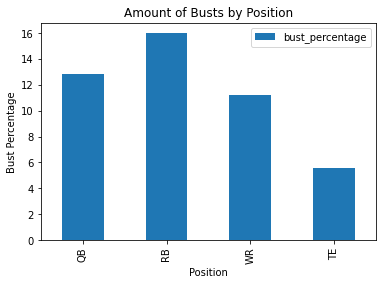

In [39]:
#Plots this data frame in a bar chart

compare_to_average_df.plot(kind = "bar", y = "bust_percentage", ylabel = "Bust Percentage", xlabel = "Position", title = "Amount of Busts by Position")

**Answer:**

Players bust 16.4% of the time, and the percentage is very close for RBs, WRs, and TEs, but QBs are slightly less.

**Observations/Interpretations:**

Despite seeing that injuries impact QBs in 2019, they were the lowest percentage of busts. This could possibly be due to the fact QBs usually are not contacted as much as other players and injured less.

**Question 3:**

How often were players did players in each position boom (scored significantly more than average)?

**Steps:**

A. Count player that scored more than 50% above mean

B. Find percentage

E. Add this data to data frame

F. Plot this data in charts

In [55]:
#Count player that scored more than 50% above mean

qb_above_mean = float(qb_df[qb_df["FantasyPoints"] >= qb_mean + qb_mean/2].shape[0])
rb_above_mean = float(rb_df[rb_df["FantasyPoints"] >= rb_mean + rb_mean/2].shape[0])
wr_above_mean = float(wr_df[wr_df["FantasyPoints"] >= wr_mean + wr_mean/2].shape[0])
te_above_mean = float(te_df[te_df["FantasyPoints"] >= te_mean + te_mean/2].shape[0])

In [56]:
#Finds percentage

qb_above_mean_percentage = qb_above_mean / 125.0 * 100
rb_above_mean_percentage = rb_above_mean / 125.0 * 100
wr_above_mean_percentage = wr_above_mean / 125.0 * 100
te_above_mean_percentage = te_above_mean / 125.0 * 100

In [57]:
#Add this data to data frame

compare_to_average_df["boom_percentage"] = [qb_above_mean_percentage, rb_above_mean_percentage
                                                 , wr_above_mean_percentage, te_above_mean_percentage]
compare_to_average_df

,bust_percentage,boom_percentage
QB,10.4,3.2
RB,17.6,16.0
WR,9.6,8.8
TE,17.6,17.6


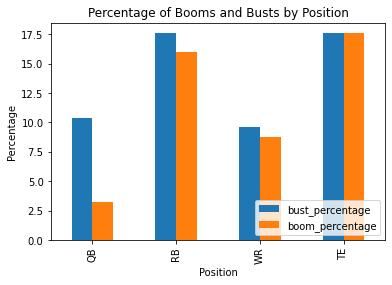

In [63]:
#Plots this data frame in a bar chart

compare_to_average_df.plot(kind = "bar", ylabel = "Percentage", xlabel = "Position", title = "Percentage of Booms and Busts by Position")
plt.legend(loc = 4)

**Answer:**

Players boom about 12% of the time, and the percentage is very close for RBs, WRs, and TEs, but QBs are slightly less.

**Observations/Interpretations:**

When comparing booms and busts, we can see the players have bad seasons more often than they have good seasons. It is also interesting to see that for both booms and busts, QBs were a lower percentage than the other positions.